## Classificação de Aprovações de Empréstimos com Scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    matthews_corrcoef,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


KeyboardInterrupt: 

In [ ]:
def select_columns(df):
    binarizer = LabelEncoder()
    df[["Gender", "Married", "Education", "Self_Employed", "Loan_Status"]] = df[
        ["Gender", "Married", "Education", "Self_Employed", "Loan_Status"]
    ].apply(lambda x: binarizer.fit_transform(x))
    return df

In [ ]:
def file_():
    df = pd.read_csv("train_loan.csv")
    df = df.drop(columns=["Loan_ID", "Dependents"])
    df = df.dropna()
    df = select_columns(df)
    return df

In [ ]:
def test_score(X_test, y_test, model, title):
    metric_df = []
    y_pred = model.predict(X_test)
    metric_df.append(
        {
            "Model": title,
            "Precision": model.score(X_test, y_test),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "MCC": matthews_corrcoef(y_test, y_pred),
            "AUC": roc_auc_score(y_test, y_pred),
        }
    )
    metric_df = pd.DataFrame(metric_df)
    print(metric_df)

In [ ]:
def confusion_matrix_(X_test, y_test, model, title):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    sns.heatmap(
        confusion_matrix(y_test, model.predict(X_test)),
        annot=True,
        fmt="d",
        ax=axes,
    )
    axes.set_title(title)
    plt.show()

In [ ]:
df = file_()
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Loan_Status"]),
    df["Loan_Status"],
    test_size=0.3,
    stratify=df["Loan_Status"],
)

In [ ]:
# Defining preprocessing steps
stdScale = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
categoricals = ["Property_Area"]
categorical_preprocessor = Pipeline(steps=[("onehot",  OneHotEncoder(sparse_output=False))])
numeric_preprocessor = Pipeline(steps=[("scaler", StandardScaler())])


In [ ]:
# Creating a ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categoricals),
        ("numerical", numeric_preprocessor, stdScale)
    ]
)

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)

param_grid = {
    "classifier__n_neighbors": [3, 5, 10, 12],
    "classifier__weights": ["uniform", "distance"],
    "classifier__algorithm": ["ball_tree", "kd_tree", "brute"],
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['Property_Area']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                   'brute'],
                         'classifier__n_neighbors': [3, 5, 10, 12],
                         'classifier__weights': ['uniform', 'distance']})

        Model  Precision    Recall        F1       MCC       AUC
0  Best Model    0.70068  0.940594  0.811966  0.180877  0.557254


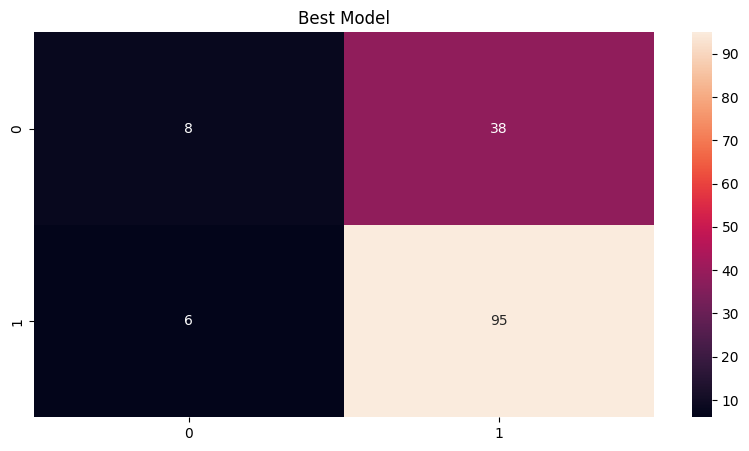

In [ ]:
test_score(X_test, y_test, grid_search, "Best Model")

confusion_matrix_(
    X_test, y_test, grid_search, "Best Model"
)